# 1. 문제정의
- 식용버섯과 독버섯을 구분해보자

# 2. 데이터 수집

In [3]:
import pandas as pd
data = pd.read_csv('./data/mushroom.csv')
data.head()
# 정답 컬럼은 poisonous, p = 독, e = 식용
# 문제 데이터는 22개의 컬럼으로 이루어져 있다
# 데이터가 전부다 글자형 데이터 -> 수치형으로 변경을 해줘야 함

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 3. 데이터 전처리
- 이상치 제거는 안 해도 됨(이상치가 존재하지 않음, 글자형 데이터라서 값의 범위가 없음)
- 결측치는 알아봐야 

In [6]:
# 결측치는 존재하지 않는다
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [23]:
# 문제와 정답으로 데이터 분리
X = data.loc[ : , 'cap-shape':]
y = data.loc[ : , 'poisonous']

In [25]:
# 글자형 데아터를 숫자형 데이터로 바꾸는 방법
# 1. 라벨 인코딩(단순 치환)
# 2. 원핫 인코딩

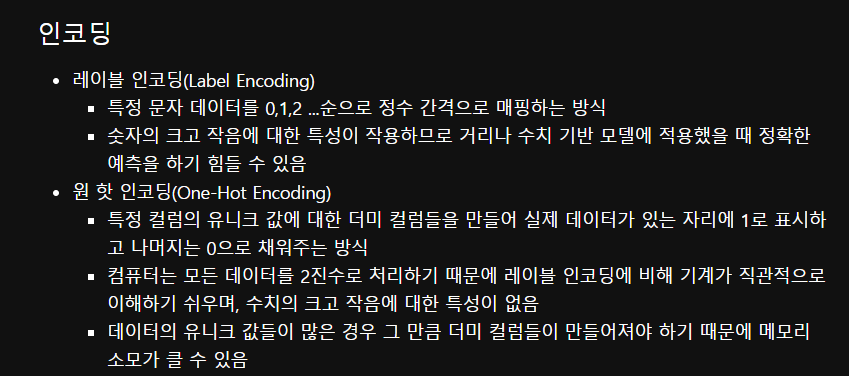

In [27]:
# 1. 라벨 인코딩
# 'x' : 0, 'b' : 1, 's' : 2, 'f' : 3, 'k' : 4, 'c' : 5
# 각 값에 대해서 하나의 숫자로 치환하기
# 장점 : 이해하기 쉽다,  데이테의 크기가 변하지 않는다
# 단점 : 숫자가 가지는 의미가 없다(컴퓨터는 보통 큰 숫자에 큰 의미를 )
X['cap-shape'].unique

<bound method Series.unique of 0       x
1       x
2       b
3       x
4       x
       ..
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap-shape, Length: 8124, dtype: object>

In [29]:
habitat_dic = {
    'u' : 2,
    'g' : 1,
    'm' : 3,
    'd' : 5,
    'p' : 4,
    'w' : 6,
    'l' : 7
}
# 코드는 실행에 목정이 있지 저장에 목적이 없음
X['habitat'].map(habitat_dic)

0       2
1       1
2       3
3       2
4       1
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

In [ ]:
# 2. 원핫인코딩
# 데이터의 유무를 0(없다, False)과 1(있다, True)로 표현
# 장점 : 데이터를 더 자세하게 표현
# 단점 : 데이터의 크기가 늘어남, 중복제거한 후의 값이 많으면 의미 없는 데이터(0)가 늘어
# 데이터의 크기가 많이 크진 않을 때 사용

# 성능은 보통 원핫인코딩이 나

In [33]:
# 전체 컬럼 원핫인코딩
X_one_hot = pd.get_dummies(X)
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


In [35]:
#False = 0
# True = 1
False + True

1

In [37]:
# 논리값이라 표현이 안되지만, 수치값으로도 사용이 가능하다
X_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: bool(117)
memory usage: 928.4 KB


# 4. 탐색적 데이터 분석
- 데이터를 그래프나 통계값을 보면서 자세하게 분석하자
- 글자를 숫자로 바꾼 데이터는 분석의 의미가 거의 없다

# 5. 모델 선택 및 하이퍼 파라미터 튜닝
- train 과 test로 데이터 분리
- Decision Tree 모델 사용

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_one_hot, y , test_size=0.3,
                                                random_state=8)

In [88]:
# 모델의 이름은 핵심 개념
# 아키네이터, 스무고개
# 여러 질문을 던지면서 대상을 맞춰간다
# 처음 던지는 질문들은 중요한 질문 모델의 이름은 핵심 개념
# 아키네이터, 스무고개
# 여러 질문을 던지면서 대상을 맞춰간다
# 처음 던지는 질문들은 중요한 질문

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=7)

# 6.학습

In [91]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

# 7.평가

In [94]:
#과대적합 : 규착아 복잡하게 설계되어서 train 데이터만 잘 맞춤
## 과대적합은 test 데이터에도 발생할 수 있다.
## 과대적합은 고정되어 있는 데이터에 발생
## 고정되어있는 데이터를 사용하면서 모델의 많이 학습을 하면
## 고정되어 있는 데이터만 잘 맞추는 규칙을 생성함 > 새로운 데이터는 못맞춤
# 과소적합 : 규칙이 너무 ㅇ벗어서 전부다 못맞춤
print(tree.score(X_test,y_test))
print(tree.score(X_train,y_train))
# 인공지능으로 서비스를 하면
# 학습데이터는 회사에서 구해옴
# 평가데이터도 회사에서 구해옴
# 실제 사용은 사용자의 데이터를 사용

#고정되어 있는 학습과 평가 데이터를 사용하면 모델이 학습데이터와 평가데이터에 과대적합이 발생


1.0

In [ ]:
# 모델을 검증하는 방법
# 데이터에 변화를 주거나, 새로운 데이터를 만들어 놓으면 과대적합을 어느정도 예방 가능

In [100]:
# 교차 검증
# 모델의 실제 성능에 가까운 수치를 볼 수 있는 방법
## 과대적합을 제외한 성능, 기존 knn.score()보다 보통 결과가 안 좋게 나옴
## 과대적합을 제외헤서 결과가 떨어지게 나오고 , 실제 결과와 비슷
from sklearn.model_selection import cross_val_score
# 교차검증이 데이터에 변화를 주는 방법
# 1. 전체 데이터를 5등분(데이터1,데이터2,데이터3,데이터4,데이터5)
# 2. 데이터1을 test로 나머지를 train으로 학습, 평가 > 결과1
# 3. 데이터2을 test로 나머지를 train으로 학습, 평가 > 결과2
# 4. 데이터3을 test로 나머지를 train으로 학습, 평가 > 결과3
# 5. 데이터4을 test로 나머지를 train으로 학습, 평가 > 결과4
# 6. 데이터5을 test로 나머지를 train으로 학습, 평가 > 결과5
# 7. 5개의 결과는 각각 다른 train 데이터와 다른 test 데이터로 모델의 결과를 출력
# 8. 다른 5개의 데이터로 결과를 확인 / 결과의 편차가 생김 > 모델의 결과의 범위를 알 수 있음

In [112]:
# cv : 데이터 분활 수, 보통 5
cross_val_score(tree,X_train,y_train,cv = 5).mean()
# 5번 확인했는데 1 에 가깝게 나왔다 = 실제 결과도 1에 가까울것이다.

# score 함수 보다는 귀찮더라도 cross_val_score로 결과 확인하기
# 실제 결과와 유사한 결과를 출력

0.9996481970096746

In [114]:
# 분류 평가 지표 : 정확도(맞춘 갯수 / 전체 갯수)

# 사진을 넣으면 개와 고양이를 구분하는 모델
# 0.95 = 95%로 정답을 맞춘다? 잘 만들었누?

# 고양이 95장, 강아지 5장을 테스트 데이터로 사용
# 모델의 규칙을 찾아보니, 모든 데이터는 고양이다

# 분류 모델을 평가할때 정확도 만으로 판단하기에는 오류가 있다.

# 정확도 + 다른 평가지표들도 확인을 해봐야 한다.
from sklearn.metrics import classification_report

In [124]:
tree = DecisionTreeClassifier(max_depth= 2)
tree.fit(X_train,y_train)
# TN/TP/FN/FP를 나누려면 예측값이 필요함
y_pred = tree.predict(X_train)

#print(classification_report(y_train,y_pred))
#정확도(accuracy) = 전체 중에 맞춘 비율
#재현율(recall) = 실제 값중에 맞춘 비율
#정밀도(precision) = 예측 값중에 맞춘 비율
#F1 score = 재현율과 정밀도의 조화평균값

# 재현율과 정밀도의 치이
# 애매한것을 사용한건지 말건지
# 1. 유튜브 영상 키즈락을 용도로->안 좋은 영상은 아이들에게 안 보이게 하고싶다.
#     애매한건 안쓰는게 낫다. = 정밀도가 높으면 좋은 경우(precision)
# 2. 도둑을 잡는 CCTV에 들어갈 인공지능 모델을 만드려고 한다.
#      애매한걸 쓰는게 낫다. = 재현율이 높으면 좋은 경우(recall)

# 식용버섯을 골라내서 먹으려고 한다
## 식용버섯은 예측할때는 애매한거 안 쓴다.(precision)
## 독버섯을 예측 할 때는 애매한거 쓴다.(recall)

## 결국에는 재현율과 정밀도는 둘 다 높은게 좋다
## 둘다 높다 = 애매한게 없다 = 규칙이 확실해서 구분이 잘 된다.

## 특정 목적이 있다 = recall 또는 precision의 값을 확인, 
## 목적이 뚜렷하지 않다 = f1 score 값 확인

# 결론 : 하나의 값만 확인 해야한다? -> F1-score 가 좋은 경우가 많다.!

In [120]:
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

0.9563841013014421
0.9491386382280558
